In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth',None)

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

In [ ]:
import re
import unicodedata
import contractions
from bs4 import BeautifulSoup

In [ ]:
FILE_NAME="Reviews.csv"

In [ ]:
# Loading data into pandas dataframe
data = pd.read_csv(FILE_NAME)

In [ ]:
data.shape

In [ ]:
data.head()

In [ ]:
data['Score'].value_counts(normalize=True,
                          dropna=False).sort_index()

In [ ]:
data = data.head(50000)

In [ ]:
data['_flag'] = 0

data.loc[data.index>50000, '_flag'] = None

data.dropna(subset=['_flag'], inplace=True)

data.drop(columns=['Id','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator',
                  'Time','Summary','ProductId','_flag'],
         inplace=True)

In [ ]:
data.shape

### Data Pre-processing:

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data

We have used NLTK library to tokenize words , remove stopwords and lemmatize the remaining words.

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text

def tokenize_text(text):
    return nltk.word_tokenize(text)

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        #new_word = lemmatizer.lemmatize(re.sub(r'[^\w\s]', '', word.lower()))
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos='v'))
        
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words


def normalize(text):
    text = strip_html(text)
    text = replace_contractions(text)
    text = remove_numbers(text)
    words = tokenize_text(text)
    
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

In [ ]:
from nltk.corpus import stopwords   
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

stopwords = list(set(stopwords) - set(customlist))

lemmatizer = WordNetLemmatizer()

In [ ]:
%%time
data.head(100).apply(lambda row: normalize(row['Text']), axis=1)

In [ ]:
from tqdm import tqdm
tqdm.pandas()

In [ ]:
_a = data.head(1000).progress_apply(lambda row: normalize(row['Text']), axis=1)

In [ ]:
_A=data.head(500).apply(lambda row: normalize(row['Text']), axis=1)

In [ ]:
_A=data.head(500).progress_apply(lambda row: normalize(row['Text']), axis=1)

In [ ]:
!python3 -m pip install pandarallel

In [ ]:
from pandarallel import pandarallel

In [ ]:
pandarallel.initialize()

In [ ]:
%%time 
a_ = data.head(5000).apply(lambda row: normalize(row['Text']), axis=1)

In [ ]:
%%time 
a_ = data.head(5000).parallel_apply(lambda row: normalize(row['Text']), axis=1)

In [ ]:
pandarallel.initialize()

In [ ]:
data.head(500).parallel_apply(lambda row: normalize(row['Text']), axis=1)

In [ ]:
data['Text'] = data.parallel_apply(lambda row: normalize(row['Text']), axis=1)

In [27]:
data['text_l'] = data['Text'].str.len()

In [28]:
data.groupby(by='Score')['text_l'].agg('mean').round(2)

Score
1    275.31
2    285.55
3    299.09
4    287.84
5    229.40
Name: text_l, dtype: float64

In [29]:
!python3 -m pip install wordcloud

     |████████████████████████████████| 220 kB 978 kB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=157997 sha256=00dc5f850b1dfbf13fd71ddfbf111df1de0cd9d378190e57b758cb747bdffa61
  Stored in directory: /Users/vinodgattani/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud


In [30]:
from wordcloud import WordCloud

In [31]:
comment_words = '' 

  
for val in data[data['Score']==5].Text: 
      
    # split the value
    tokens = val.split() 

    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                min_font_size = 10).generate(comment_words) 

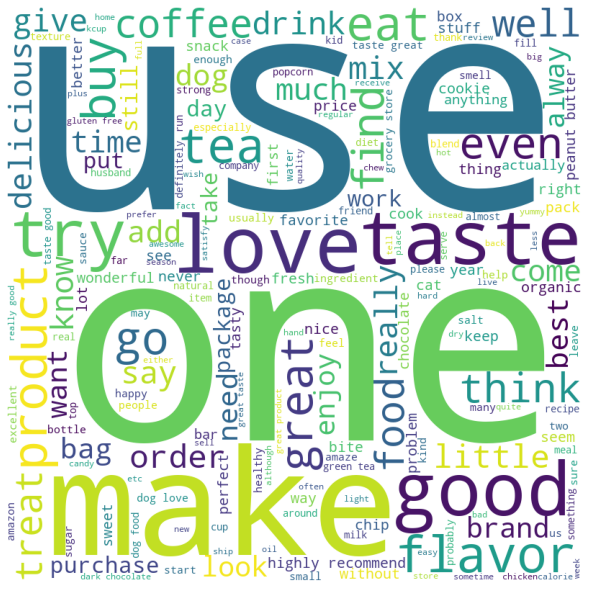

In [32]:
# plot the WordCloud image                        
import matplotlib.pyplot as plt 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

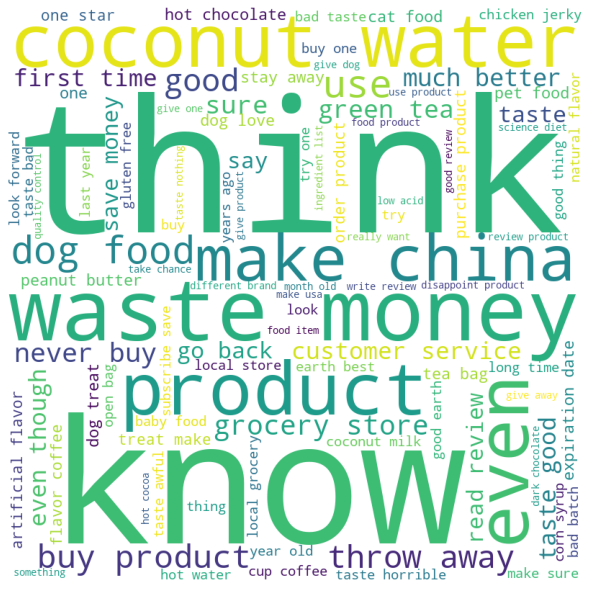

In [33]:
score_1_words = '' 

  
for val in data[data['Score']==1].Text: 
      
    # split the value 
    tokens = val.split() 

    score_1_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                min_font_size = 10,
                     collocation_threshold=3).generate(score_1_words)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [34]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [55]:
vectorizer = TfidfVectorizer(max_features=1000)  

In [41]:
dummy = pd.read_clipboard(sep=",")

In [42]:
dummy

,text
0,today's session is about nlp
1,previous session was about cv
2,we will cover vectorizer in nlp
3,today's case study is about sentiment analysis


In [56]:
data_features = vectorizer.fit_transform(dummy['text'])

In [57]:
data_features_dense = data_features.todense()

In [52]:
data_features

<4x35 sparse matrix of type '<class 'numpy.int64'>'
	with 42 stored elements in Compressed Sparse Row format>

In [58]:
data_features_dense

matrix([[0.3752176 , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.46346838, 0.46346838, 0.        , 0.        ,
         0.46346838, 0.        , 0.46346838, 0.        , 0.        ,
         0.        , 0.        ],
        [0.31799276, 0.        , 0.        , 0.        , 0.49819711,
         0.        , 0.        , 0.        , 0.49819711, 0.        ,
         0.39278432, 0.        , 0.        , 0.        , 0.49819711,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.42176478, 0.        ,
         0.42176478, 0.        , 0.3325242 , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.42176478, 0.        ,
         0.42176478, 0.42176478],
        [0.26851522, 0.42068099, 0.42068099, 0.        , 0.        ,
         0.        , 0.33166972, 0.        , 0.        , 0.42068099,
         0.        , 0.42068099, 0.33166972, 0.        , 0.        ,
         0.        , 0.        ]])

* today's about session is about nlp
* previous session was about cv
* we will cover vectorizer in nlp
* today's case study is about sentiment analysis

In [60]:
len(vectorizer.get_feature_names())

17

In [61]:
vectorizer = CountVectorizer(max_features=1000)                # Keep only 1000 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(data['Text'])

#data_features = data_features.toarray()
labels = data['Score'].astype('int')
X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [62]:
forest = RandomForestClassifier(n_estimators=100,
                                max_depth=5,
                                n_jobs=-1)
forest.fit(X_train, y_train)
forest.score(X_train, y_train), forest.score(X_test, y_test)

(0.6239428571428571, 0.6194253716418905)

In [63]:
gbm = GradientBoostingClassifier(n_estimators=100,
                                max_depth=5,
                                )
gbm.fit(X_train, y_train)
gbm.score(X_train, y_train), gbm.score(X_test, y_test)

(0.7434285714285714, 0.677754816345577)

In [64]:
vectorizer = CountVectorizer(max_features=500,
                            ngram_range=(1,2))
data_features = vectorizer.fit_transform(data['Text'])

#data_features = data_features.toarray()
labels = data['Score'].astype('int')
X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

gbm = GradientBoostingClassifier(n_estimators=100,
                                max_depth=5,
                                )
gbm.fit(X_train, y_train)
gbm.score(X_train, y_train), gbm.score(X_test, y_test)


(0.7354571428571428, 0.6676221585227652)

In [65]:
vectorizer = TfidfVectorizer(max_features=500,
                            ngram_range=(1,2))
data_features = vectorizer.fit_transform(data['Text'])

#data_features = data_features.toarray()
labels = data['Score'].astype('int')
X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

gbm = GradientBoostingClassifier(n_estimators=100,
                                max_depth=5,
                                )
gbm.fit(X_train, y_train)
gbm.score(X_train, y_train), gbm.score(X_test, y_test)


(0.7523428571428571, 0.6704886340910606)

In [66]:
data.reset_index(inplace=True,
                drop=True)

In [67]:
train_data = data.sample(frac=0.7)

test_data = data[~data.index.isin(train_data.index)]

train_data.shape, test_data.shape

((35001, 3), (15000, 3))

In [68]:
train_data = train_data[(train_data['Score']<=2)|(train_data['Score']>=4)]

train_data['flag'] = train_data['Score'].values>=4

train_data.shape

(32149, 4)

In [69]:
vectorizer = CountVectorizer(max_features=500)                # Keep only 1000 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(train_data['Text'])

#data_features = data_features.toarray()
#labels = data['Score'].astype('int')
#X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

forest = GradientBoostingClassifier(n_estimators=100,
                                max_depth=3
                                   )
forest.fit(data_features, train_data['flag'])

GradientBoostingClassifier()

In [70]:

test_features = vectorizer.transform(test_data['Text'])
test_data['prob'] = forest.predict_proba(test_features)[:,1]


<ipython-input-70-a9f1de294e97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['prob'] = forest.predict_proba(test_features)[:,1]


In [71]:
test_data.groupby(by='Score')['prob'].agg(['mean','median'])

,mean,median
Score,,
1,0.628393,0.683582
2,0.669842,0.697129
3,0.749889,0.785462
4,0.832827,0.873152
5,0.884347,0.915275


In [97]:
def assign_label(prob):
    if prob <= 0.62:
        return 1
    elif prob <= 0.69:
        return 2
    elif prob <= 0.76:
        return 3
    elif prob <= 0.85:
        return 4
    else:
        return 5

In [98]:
test_data['Score_p'] = test_data['prob'].apply(assign_label)

<ipython-input-98-42a2ab568bd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Score_p'] = test_data['prob'].apply(assign_label)


In [99]:
test_data['Score_p'].value_counts().sort_index()

1    1442
2     791
3    1265
4    2155
5    9347
Name: Score_p, dtype: int64

In [100]:
test_data['Score'].value_counts().sort_index()

1    1420
2     833
3    1195
4    2194
5    9358
Name: Score, dtype: int64

In [75]:
test_data['correct'] = test_data['Score_p']==test_data['Score']
test_data['correct'].mean()

<ipython-input-75-a87141b5ddaf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['correct'] = test_data['Score_p']==test_data['Score']


0.5714

In [102]:
test_data.groupby('Score_p')['correct'].agg('mean')

Score_p
1    0.393897
2    0.144121
3    0.151779
4    0.192575
5    0.779073
Name: correct, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "12345"],
                  columns = [i for i in "12345"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

#### Other things

1. Count of emojis
2. count of hash tags
3. lenght of sentences
4. whether product was returned
5. did user buy this product in the past
6. product history
7. user history